In [2]:
# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
font = {'size'   : 12}
plt.rc('font', **font)

## Binomial distribution

The probability to be at position $m$ after $N$ steps is
\begin{eqnarray}
P_d(m,N) = 
\begin{cases}
0 & \mathrm{if} \, N \, \mathrm{even} \, \mathrm{and} \, m \, \mathrm{odd} \cr
0 & \mathrm{if} \, N \, \mathrm{odd} \, \mathrm{and} \, m \, \mathrm{even} \cr
\frac{N!}{
\frac{N+m}{2}!
\cdot
\frac{N-m}{2}!
}
\left( 
\frac{1}{2}
\right)^N
&
\rm else
\end{cases}
\end{eqnarray}

For very large $N$, the distribution function becomes continuous. To see this, let’s apply Stirling’s approximation, $N!\approx (N/e)^N \sqrt{2\pi N}$, and after a bit of manipulation we find

\begin{eqnarray}
P_c(m,N) =\sqrt{\frac{2}{N \pi}}\exp\left( - \frac{m^2}{2 N}\right)
\end{eqnarray}

The expected position is
$$
\langle m \rangle = 0
$$

The variance of the position is
$$
\langle m^2 \rangle = N
$$

In [12]:
# Initial position
x0 = 0 # nm

# Discrete distribution assuming p = 0.5
def Pd(m,N):
    p  = 0.5

    nL = 0.5*(N - m)
    nR = 0.5*(N + m)
    
    P = factorial(N) / factorial(nL) / factorial(nR) * p**nL * (1 - p)**nR    
    
    # if N even m odd
    P[(N % 2 == 0) & (m % 2 != 0)] = 0
    
    # if N even m odd
    P[(N % 2 != 0) & (m % 2 == 0)] = 0
    
    return  P

# Continuous distribution
def Pc(m,N):
    P = ( 2 / N / np.pi )**0.5 * np.exp( - m**2 * ( 2 * N )**-1 )

    return  P

C:\Users\donat\AppData\Local\Temp\ipykernel_10060\2084961435.py:11: RuntimeWarning: divide by zero encountered in divide
  P = factorial(N) / factorial(nL) / factorial(nR) * p**nL * (1 - p)**nR


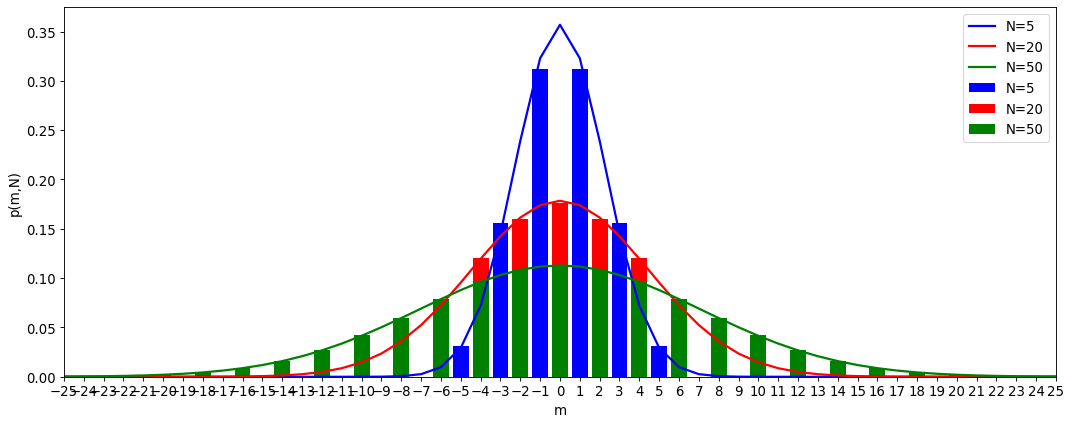

In [13]:
mmin  = -25 #25
mmax  = -mmin
mbins =  1 + mmax-mmin
mcenters = np.linspace(mmin,mmax,mbins)
medges   = np.linspace(mmin-0.5,mmax+0.5,mbins+1)

# N = 5
Pd5 = Pd(mcenters,5)
Pc5 = Pc(mcenters,5)

# N = 20
Pd20 = Pd(mcenters,20)
Pc20 = Pc(mcenters,20)

# N = 50
Pd50 = Pd(mcenters,50)
Pc50 = Pc(mcenters,50)

plt.figure(figsize=(16, 6), dpi=80)
plt.plot(mcenters, Pc5, 'b-', label = 'N=5', linewidth=2 )
plt.bar(mcenters, Pd5, color='b', label = 'N=5' )
plt.plot(mcenters, Pc20, 'r-', label = 'N=20', linewidth=2 )
plt.bar(mcenters, Pd20, color='r', label = 'N=20' )
plt.plot(mcenters, Pc50, 'g-', label = 'N=50', linewidth=2 )
plt.bar(mcenters, Pd50, color='g', label = 'N=50' )

plt.xticks(mcenters)
plt.xlim((mmin, mmax))
plt.xlabel('m')
plt.ylabel('p(m,N)')
plt.legend()

## Random walk on a grid

Consider the Bernoulli process $\lbrace{Y_i}\rbrace_{i\geq 0}$ with entries

$$
Y_i = 
\begin{cases}
-1 & \mathrm{with} \, p=\frac{1}{2} \cr
1 & \mathrm{with} \, p=\frac{1}{2} 
\end{cases}
$$

The random walk is the sequence $\lbrace{X_n}\rbrace_{n\geq 0}$ with

$$
X_{n+1} = X_n + Y_n \, ,
$$

where $Y_n$ is a Bernoulli trial.

The random walk can be also defined as

$$
X_{n} = X_0 + \sum_{i=1}^n Y_i \, ,
$$

C:\Users\donat\AppData\Local\Temp\ipykernel_10060\2084961435.py:11: RuntimeWarning: divide by zero encountered in divide
  P = factorial(N) / factorial(nL) / factorial(nR) * p**nL * (1 - p)**nR


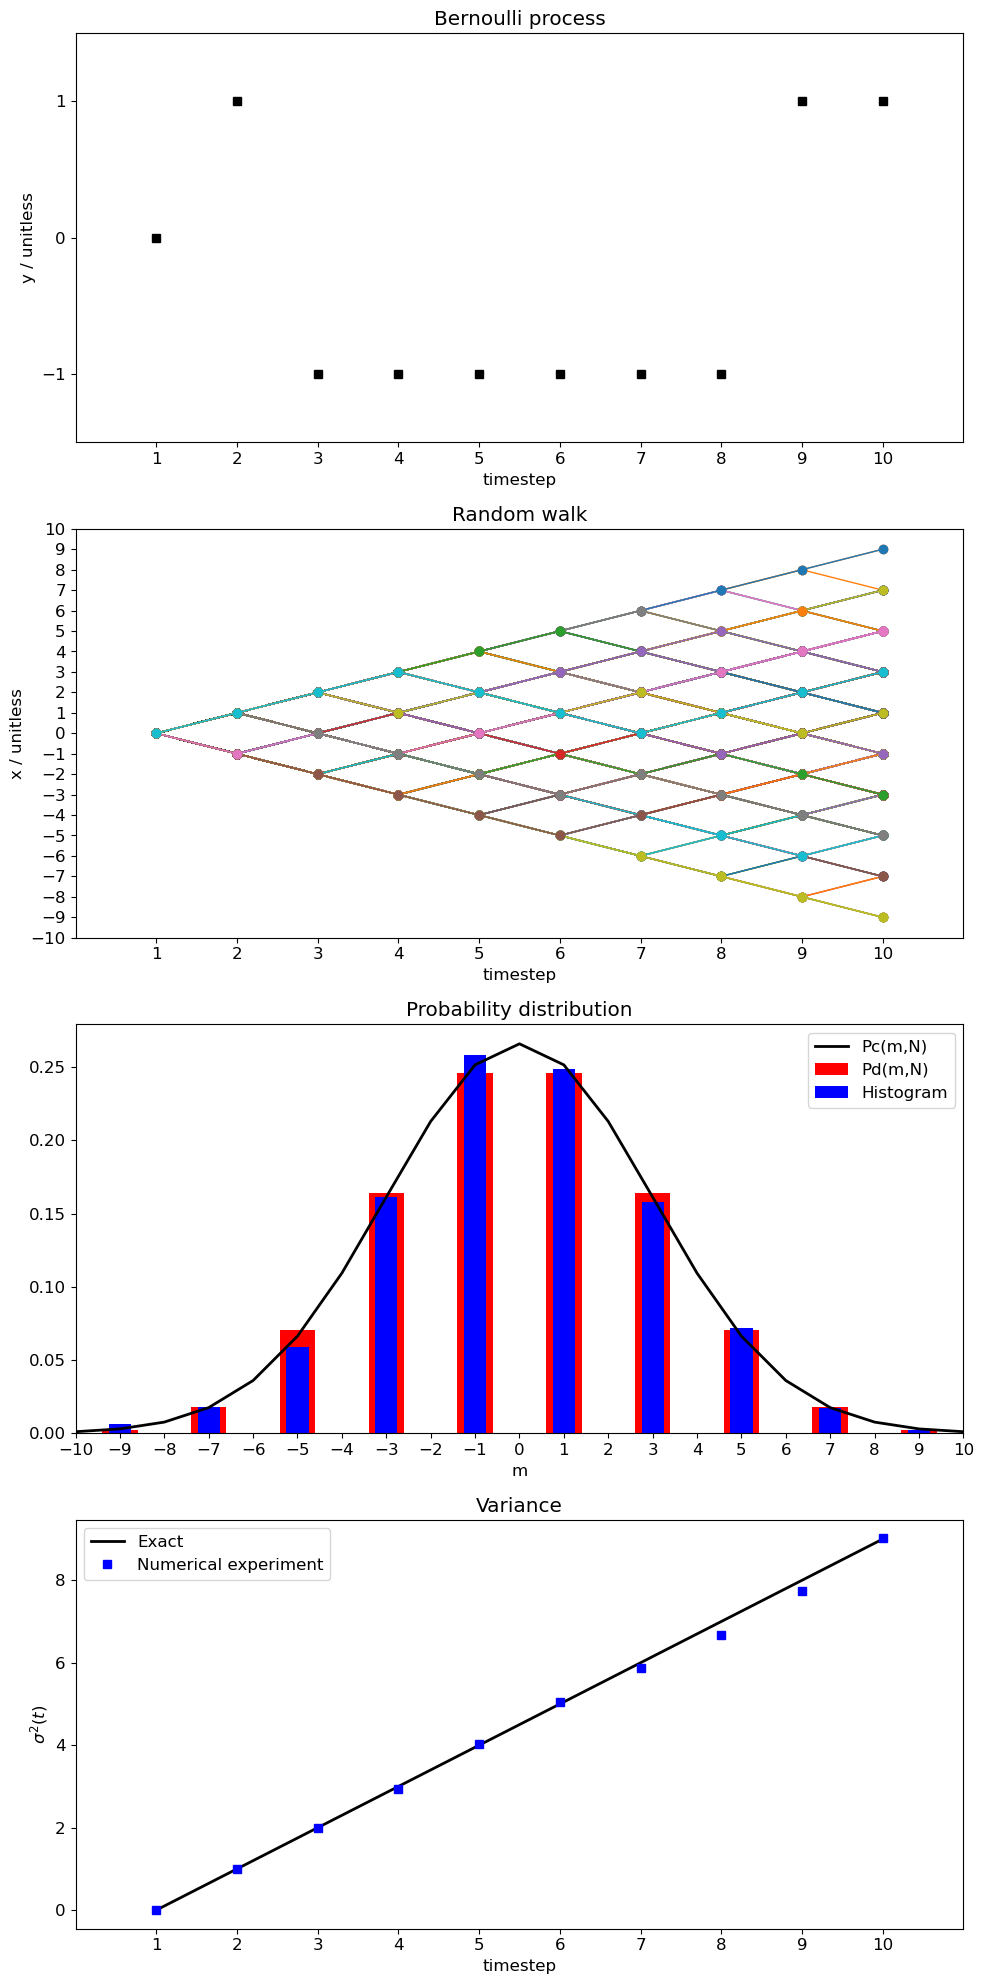

In [61]:
# Grid
mmin  = -75
mmax  =  75
mbins =  1 + mmax-mmin
mcenters = np.linspace(mmin,mmax,mbins)
medges   = np.linspace(mmin-0.5,mmax+0.5,mbins+1)


# Number of simulations (replicas)
Nreps  = 1000

# Number of timesteps per each trajectory
Nsteps    = 10

# Array of t values
tvalues = np.linspace(1, Nsteps, Nsteps)

# Arrays of Bernoulli process and random walk
X   = np.zeros((Nsteps,Nreps))
Y   = np.zeros((Nsteps,Nreps))

# Variance
vt  = np.zeros(Nsteps)

for n in range(Nsteps-1):
    # Draw a random number -1 or 1
    r = 2 * np.random.randint(2, size=(1,Nreps)) - 1
    
    # Bernoulli process
    Y[n+1,:]  = r
    
    # Random walk    
    X[n+1,:]  = X[n,:] + Y[n+1,:]
    
    # Variance at each timestep
    vt[n+1]   = np.var(X[n+1,:])
    
vart = np.linspace(0, Nsteps-1, Nsteps)

# Histogram
h  = np.histogram(X[-1,:], bins=medges, density=True)
h0 = h[0]
h0[h0== 0] = float('nan')
    
# Figure
xmin =   np.min(X)
xmax =  -xmin

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, figsize=(10, 20))

ax0.plot(tvalues, Y[:,0], 'ks', linewidth=0.5);
ax0.set_xlabel('timestep')
ax0.set_ylabel('y / unitless')
ax0.set_xlim((0,Nsteps+1))
ax0.set_ylim((-1.5, 1.5))
ax0.set_title('Bernoulli process')
ax0.set_xticks(tvalues)
ax0.set_yticks((-1,0,1))

ax1.figure
ax1.plot(tvalues, X, 'o-', linewidth=1);
ax1.set_xlabel('timestep')
ax1.set_ylabel('x / unitless')
ax1.set_xlim((0,Nsteps+1))
#ax1.set_ylim((xmin, xmax))
ax1.set_title('Random walk')
ax1.set_xticks(tvalues)
ax1.set_yticks(np.linspace(-Nsteps,Nsteps,2*Nsteps+1))

ax2.bar(mcenters, Pd(mcenters,Nsteps-1), color='r', label = 'Pd(m,N)' )
ax2.bar(mcenters, h0, color='b', label = 'Histogram', width  = 0.5 )
ax2.plot(mcenters, Pc(mcenters,Nsteps-1), 'k-', label = 'Pc(m,N)', linewidth = 2)

ax2.set_xlim((-Nsteps,Nsteps))
ax2.set_xlabel('m')
ax2.set_title('Probability distribution')
ax2.legend();
ax2.set_xticks(np.linspace(-Nsteps,Nsteps,2*Nsteps+1))

ax3.plot(tvalues, vart, 'k', label = 'Exact', linewidth = 2)
ax3.plot(tvalues, vt, 'bs', label = 'Numerical experiment', linewidth = 2)
ax3.set_xlim((0,Nsteps+1))
ax3.set_xlabel('timestep')
ax3.set_ylabel(r'$\sigma^2(t)$')
ax3.set_title('Variance')
ax3.legend()
ax3.set_xticks(tvalues)

fig.tight_layout()
